# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [2]:
# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]


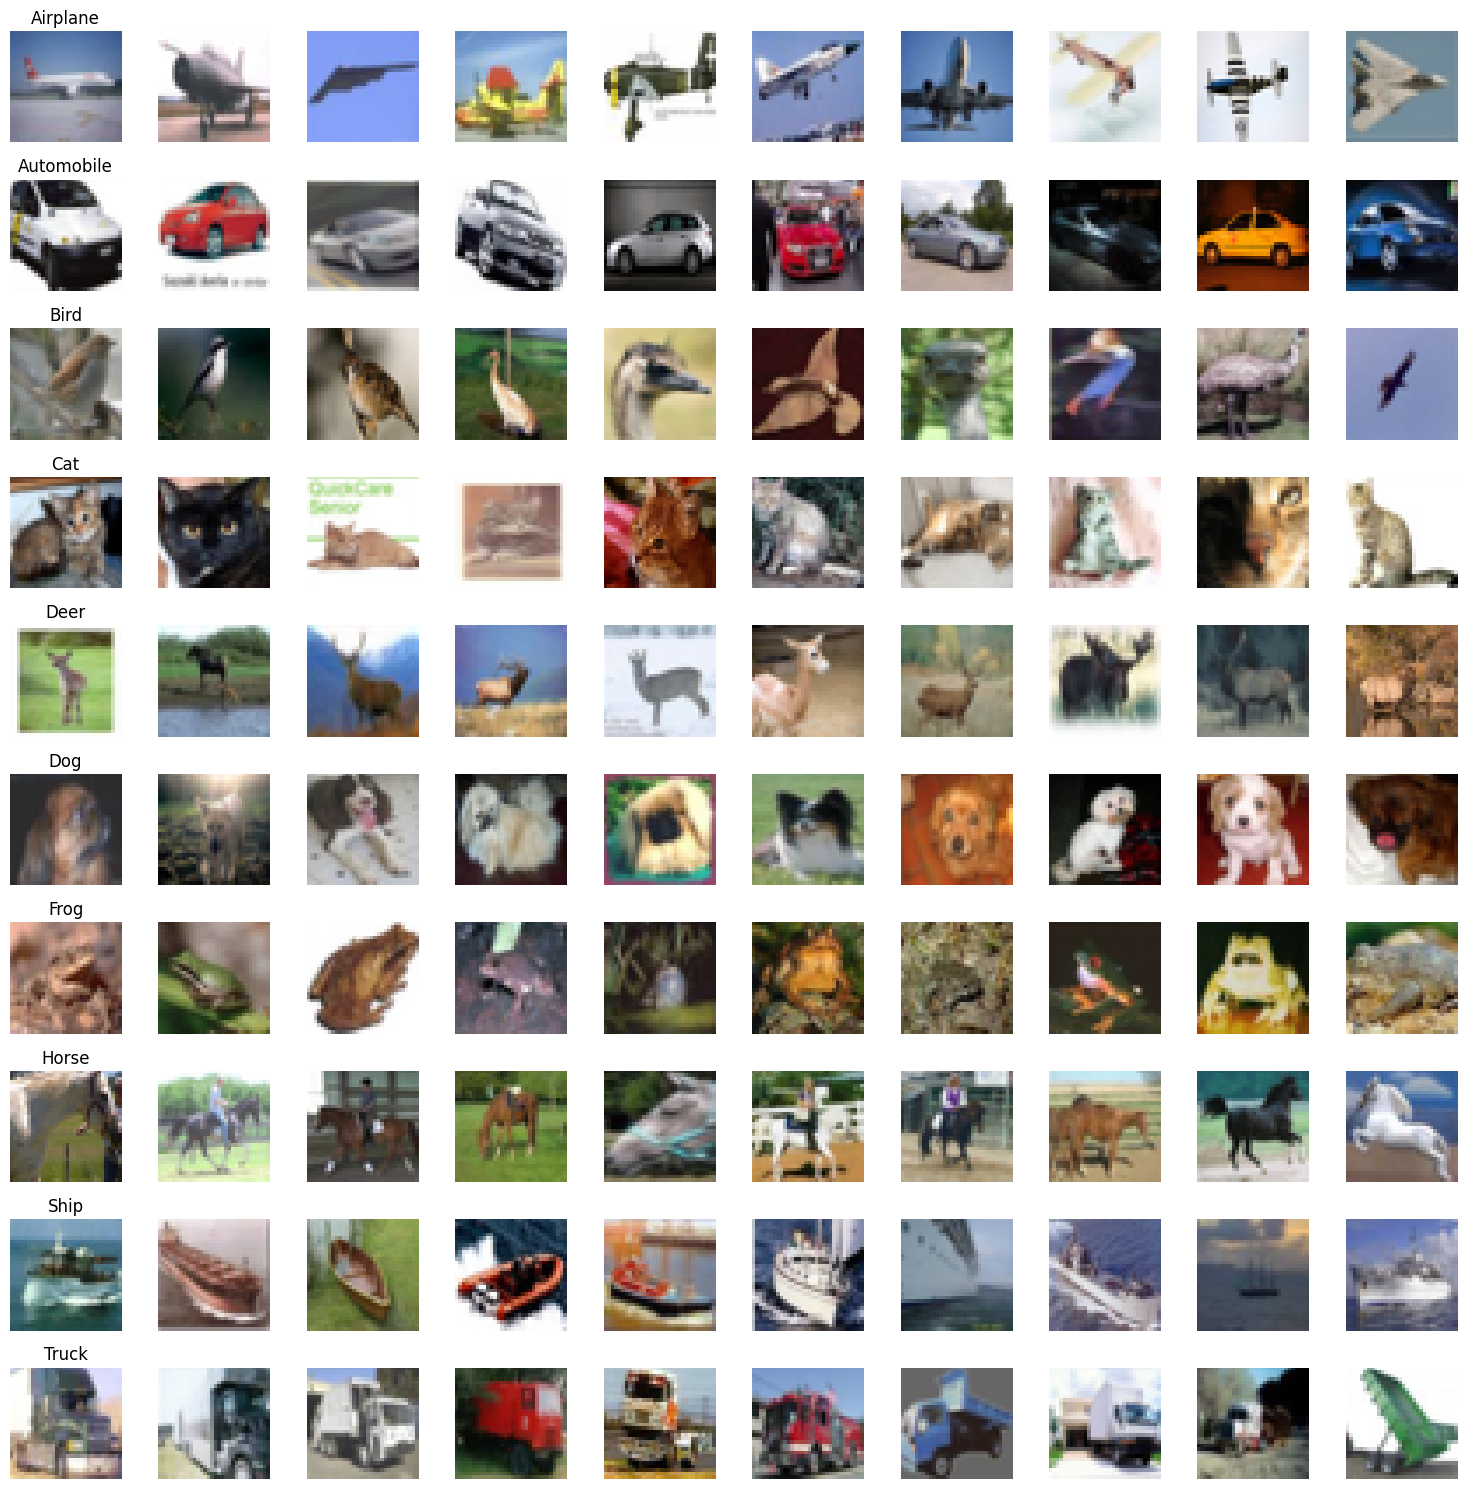

In [3]:
# Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
plt.figure(figsize=(15, 15))

# Loop through each class and plot 10 random images from each class
for i in range(10):
    class_indices = np.where(y_train == i)[0]  # Find indices for the current class
    random_indices = np.random.choice(class_indices, 10, replace=False)  # Select 10 random samples

    for j, idx in enumerate(random_indices):
        plt.subplot(10, 10, 10 * i + j + 1)  # Adjust the position for each image
        plt.imshow(x_train[idx])  # Show image
        plt.axis("off")  # Hide axes for better visualization
        if j == 0:
            plt.title(class_names[i])  # Title for the first image of each class

plt.tight_layout()  # Adjust spacing between images
plt.show()

In [4]:
#Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [5]:
print("New y_train shape:", y_train.shape)
print("New y_test shape:", y_test.shape)

New y_train shape: (50000, 10)
New y_test shape: (10000, 10)


In [6]:
#Normalize the images.
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [7]:
print("New x_train shape:", x_train.shape)
print("New x_test shape:", x_test.shape)

New x_train shape: (50000, 32, 32, 3)
New x_test shape: (10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
# Your code here :
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape= (32,32,3)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
batch_size = 512
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1538 - loss: 2.2793 - val_accuracy: 0.2311 - val_loss: 2.1868
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2551 - loss: 2.1547 - val_accuracy: 0.2863 - val_loss: 2.0643
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2917 - loss: 2.0366 - val_accuracy: 0.3094 - val_loss: 1.9803
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3200 - loss: 1.9560 - val_accuracy: 0.3292 - val_loss: 1.9269
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3394 - loss: 1.9035 - val_accuracy: 0.3466 - val_loss: 1.8862
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3476 - loss: 1.8735 - val_accuracy: 0.3430 - val_loss: 1.8652
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3582 - loss: 1.8491 - val_accuracy: 0.3695 - val_loss: 1.8303
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3685 - loss: 1.8204 - val_accuracy: 0.3566 - v

*   Plot the cross entropy loss curve and the accuracy curve

In [11]:
# Your code here :
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.3649572134017944
Test accuracy: 0.5227000117301941


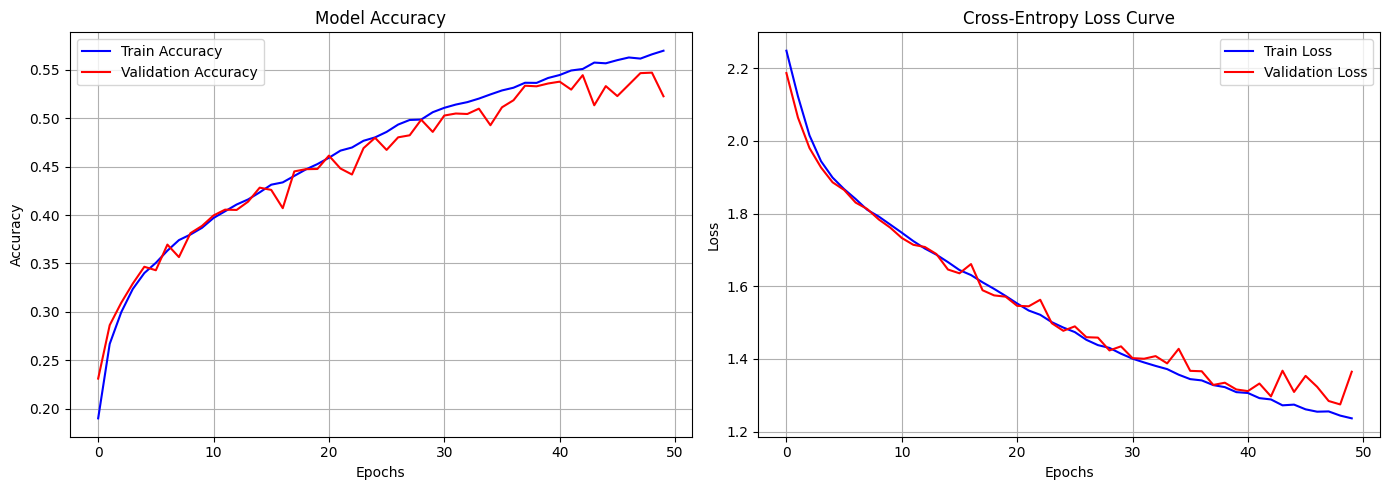

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

axs[0].plot(history.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Cross-Entropy Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [13]:
from keras.backend import clear_session
clear_session()

In [14]:
# Your code here :
from tensorflow.keras import layers, models

vgg = models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [15]:
# Your code here :
batch_size = 512
epochs = 50
vgg.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history2 = vgg.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.1434 - loss: 2.2859 - val_accuracy: 0.2413 - val_loss: 2.2021
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2545 - loss: 2.1528 - val_accuracy: 0.2896 - val_loss: 2.0260
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2925 - loss: 2.0189 - val_accuracy: 0.3267 - val_loss: 1.9292
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3252 - loss: 1.9391 - val_accuracy: 0.3478 - val_loss: 1.8634
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3482 - loss: 1.8756 - val_accuracy: 0.3439 - val_loss: 1.9113
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3624 - loss: 1.8196 - val_accuracy: 0.3724 - val_loss: 1.8026
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3744 - loss: 1.7942 - val_accuracy: 0.3880 - val_loss: 1.7562
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3838 - loss: 1.7700 - val_accuracy: 0.3812 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [16]:
# Your code here :
score2 = vgg.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 1.2518810033798218
Test accuracy: 0.5555999875068665


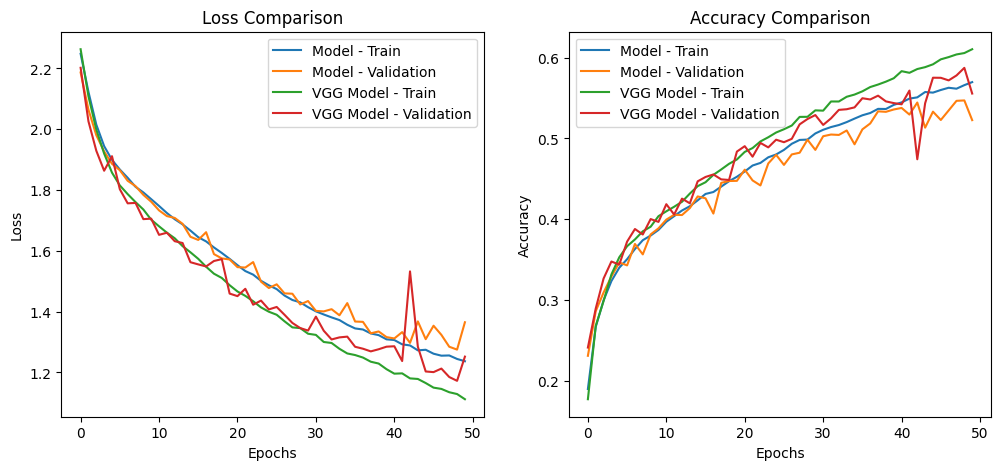

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot Loss Curves
axes[0].plot(history.history['loss'], label='Model - Train')
axes[0].plot(history.history['val_loss'], label='Model - Validation')
axes[0].plot(history2.history['loss'], label='VGG Model - Train')
axes[0].plot(history2.history['val_loss'], label='VGG Model - Validation')
axes[0].set_title('Loss Comparison')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot Accuracy Curves
axes[1].plot(history.history['accuracy'], label='Model - Train')
axes[1].plot(history.history['val_accuracy'], label='Model - Validation')
axes[1].plot(history2.history['accuracy'], label='VGG Model - Train')
axes[1].plot(history2.history['val_accuracy'], label='VGG Model - Validation')
axes[1].set_title('Accuracy Comparison')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

**Comment on the observation**

*Both model are learning effectively as loss decreases and accuracy improve,the Vgg model seems to perform slightly better in terms of both lower loss and higher accuracy.*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [18]:
# Your code here :
pred = vgg.predict(x_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


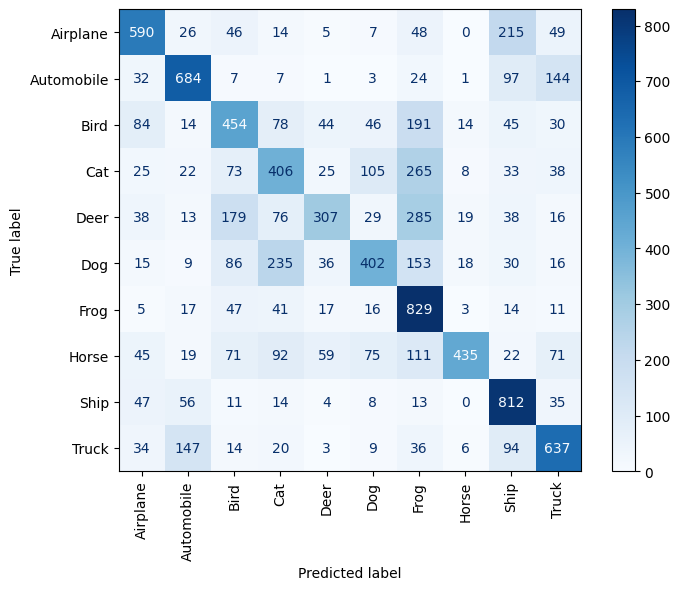

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")

**Comment here :**

*Misclassifications are identified in the off-diagonal values of the confusion matrix*

...

*    Print the test accuracy for the trained model.

In [20]:
# Your code here :
test_loss, test_accuracy = vgg.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.5556 - loss: 1.2519
Test Accuracy: 55.56%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [21]:
from keras.backend import clear_session
clear_session()

In [22]:
import tensorflow as tf

x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

In [23]:
# Your code here :
vgg_complete = keras.Sequential([

    keras.Input(shape=(64,64,3)),

    #first Conv Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second Conv Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third Conv Block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

vgg_complete.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [24]:
# Your code here :
batch_size = 512
epochs = 10
vgg_complete.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history3 = vgg_complete.fit(x_train_resized, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_resized, y_test), verbose=1)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 103s 752ms/step - accuracy: 0.1182 - loss: 2.3001 - val_accuracy: 0.1470 - val_loss: 2.2903
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 364ms/step - accuracy: 0.1461 - loss: 2.2831 - val_accuracy: 0.2063 - val_loss: 2.2309
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.2096 - loss: 2.1895 - val_accuracy: 0.2465 - val_loss: 2.1188
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 368ms/step - accuracy: 0.2527 - loss: 2.0790 - val_accuracy: 0.3190 - val_loss: 1.9580
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - accuracy: 0.2994 - loss: 1.9828 - val_accuracy: 0.3189 - val_loss: 1.9325
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.3292 - loss: 1.9079 - val_accuracy: 0.3677 - val_loss: 1.8098
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 364ms/step - accuracy: 0.3499 - loss: 1.8426 - val_accuracy: 0.3693 - val_loss: 1.7751
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.3646 - loss: 1.7872 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


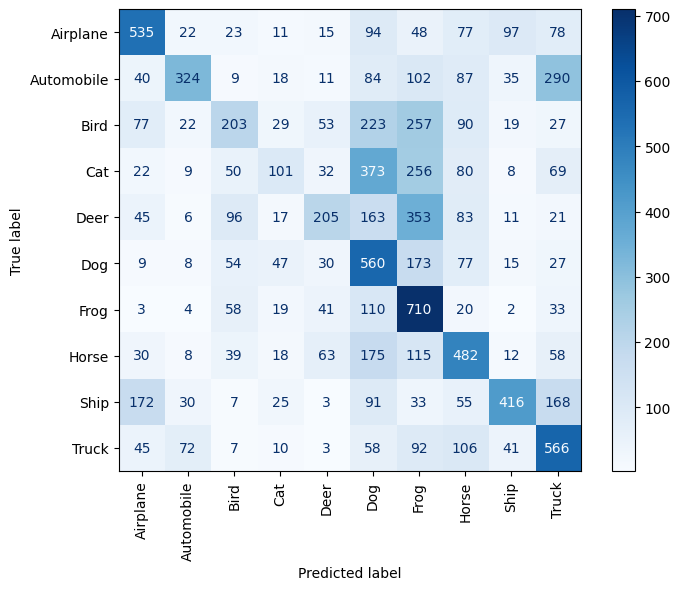

In [26]:
pred_comp = vgg_complete.predict(x_test_resized)
y_pred_comp = np.argmax(pred_comp, axis=1)
y_true_comp = np.argmax(y_test, axis=1)
# Compute confusion matrix
cm_comp = confusion_matrix(y_true_comp, y_pred_comp)
# Plot confusion matrix
disp_comp = ConfusionMatrixDisplay(confusion_matrix=cm_comp,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_comp = disp_comp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")


In [27]:
# Print classification report for further analysis
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true_comp, y_pred_comp))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1000
           1       0.64      0.32      0.43      1000
           2       0.37      0.20      0.26      1000
           3       0.34      0.10      0.16      1000
           4       0.45      0.20      0.28      1000
           5       0.29      0.56      0.38      1000
           6       0.33      0.71      0.45      1000
           7       0.42      0.48      0.45      1000
           8       0.63      0.42      0.50      1000
           9       0.42      0.57      0.48      1000

    accuracy                           0.41     10000
   macro avg       0.44      0.41      0.39     10000
weighted avg       0.44      0.41      0.39     10000



# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity, enabling neural networks to learn complex patterns.


_

2 - Key Differences between sigmoid and softmax:

_
Sigmoid Activation:

* Outputs values between 0 and 1

* Each output neuron is independent

* suitable for binary classification

_

Softmax Activation:

* Converts logits into probabilities that sum to 1

* used for multi-class classification.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

_

Binary Crossentropy:

* Used for binary classification


_

Categorical Crossentropy:

* Used for multi-class classification

* Works with softmax activation, ensuring probabilities sum to 1.

* Used when labels are one-hot encoded



